# Loan Application Prediction 
Project6

Problem Statement:
This dataset includes details of applicants who have applied for loan. 
The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:
- Loan_ID
- Gender
- Married
- Dependents
- Education
- Self_Employed
- ApplicantIncome
- CoapplicantIncome
- Loan_Amount
- Loan_Amount_Term
- Credit History
- Property_Area

Dependent Variable (Target Variable):
- Loan_Status

Prediction:   
To build a model that can predict whether the loan of the applicant will be approved or not 
on the basis of the details provided in the dataset. 

In [2]:
#Importing All Libraries required to build Model:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
#!pip install -U imbalanced-learn
#!pip install imbalanced-learn
from imblearn.over_sampling import RandomOverSampler
#import imblearn
from imblearn.over_sampling import SMOTE

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")
#pd.set_option('display.max_columns',None)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

In [4]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [5]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

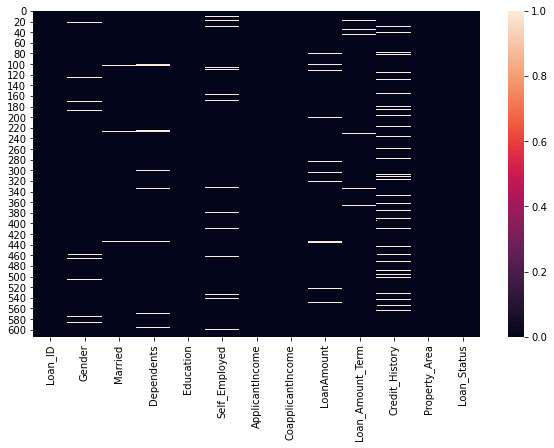

In [7]:
plt.figure(figsize=[10,6])
sns.heatmap(df.isnull())

In [8]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
df['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

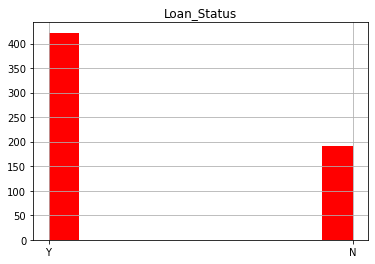

In [10]:
df["Loan_Status"].hist(grid=True,color='red')
plt.title("Loan_Status")
plt.show()

# Handling Null Values:

In [11]:
df_non_null=df.copy()

In [12]:
df_non_null['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [13]:
df_non_null['Gender'].mode()

0    Male
dtype: object

In [14]:
df_non_null.Gender=df_non_null.Gender.fillna(df_non_null['Gender'].mode()[0])

In [15]:
df_non_null['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [16]:
df_non_null['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [17]:
df_non_null['Married'].mode()

0    Yes
dtype: object

In [18]:
df_non_null.Married=df_non_null.Married.fillna(df_non_null['Married'].mode()[0])

In [19]:
df_non_null['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

In [20]:
df_non_null['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [21]:
df_non_null['Self_Employed'].mode()

0    No
dtype: object

In [22]:
df_non_null.Self_Employed=df_non_null.Self_Employed.fillna(df_non_null['Self_Employed'].mode()[0])

In [23]:
df_non_null['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [24]:
df_non_null['LoanAmount'].mean()

146.41216216216216

In [25]:
df_non_null['LoanAmount'].median()

128.0

2.677551679256059


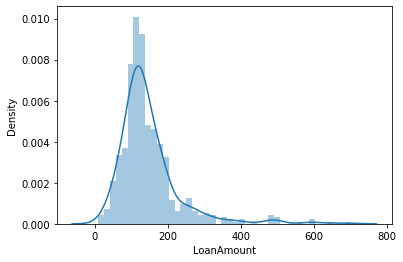

In [26]:
sns.distplot(df['LoanAmount'])
print(df_non_null['LoanAmount'].skew())

In [27]:
df_non_null['LoanAmount'] = df_non_null['LoanAmount'].fillna((df_non_null['LoanAmount'].median()))

In [28]:
df_non_null['LoanAmount']

0      128.0
1      128.0
2       66.0
3      120.0
4      141.0
       ...  
609     71.0
610     40.0
611    253.0
612    187.0
613    133.0
Name: LoanAmount, Length: 614, dtype: float64

In [29]:
df_non_null['Loan_Amount_Term'].mean()

342.0

In [30]:
df_non_null['Loan_Amount_Term'].median()

360.0

-2.362414124216269


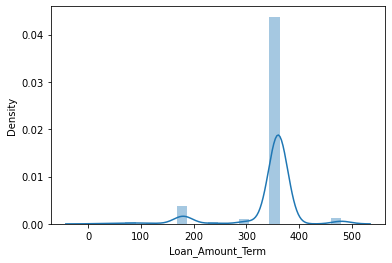

In [31]:
sns.distplot(df['Loan_Amount_Term'])
print(df_non_null['Loan_Amount_Term'].skew())

In [32]:
df_non_null['Loan_Amount_Term'] = df_non_null['Loan_Amount_Term'].fillna((df_non_null['Loan_Amount_Term'].median()))

In [33]:
df_non_null['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [34]:
df_non_null['Credit_History'].mode()

0    1.0
dtype: float64

In [35]:
df_non_null.Credit_History=df_non_null.Credit_History.fillna(df_non_null['Credit_History'].mode()[0])

In [36]:
df_non_null['Credit_History'].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

In [37]:
df_non_null['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [38]:
df_non_null['Dependents'].mode()

0    0
dtype: object

In [39]:
df_non_null.Dependents=df_non_null.Dependents.fillna(df_non_null['Dependents'].mode()[0])

In [40]:
df_non_null['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

# Label Encoding:

In [41]:
df_encoded=df_non_null.copy()

In [42]:
obj_df = df_non_null.select_dtypes(include=['object']).copy()
obj_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


In [43]:
LE=LabelEncoder()
for column in obj_df:
    df_encoded.loc[:,column] = LE.fit_transform(df_encoded.loc[:,column])
df_encoded.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


# Dropping Unwanted Columns:

In [44]:
df_column_dropped=df_encoded.copy()
column_drop1=["Loan_ID"]

In [45]:
df_column_dropped.drop(column_drop1,axis=1,inplace=True)

In [46]:
df_column_dropped.shape

(614, 12)

# EDA

## Univariate Analysis:

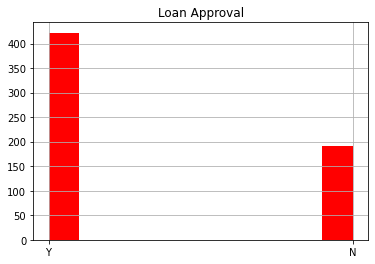

In [47]:
df["Loan_Status"].hist(grid=True,color='red')
plt.title("Loan Approval")
plt.show()

<AxesSubplot:xlabel='Gender', ylabel='count'>

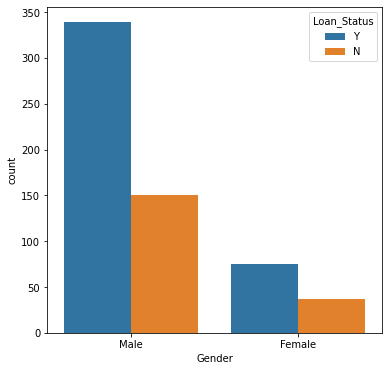

In [48]:
plt.subplots(figsize=(6,6))
sns.countplot(x='Gender',data=df,hue='Loan_Status')

<AxesSubplot:xlabel='Married', ylabel='count'>

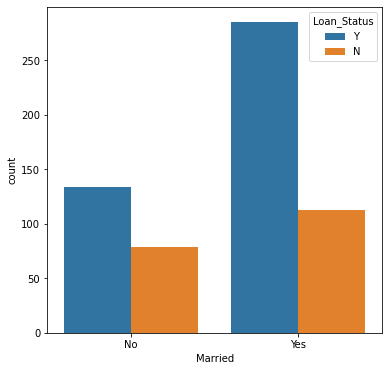

In [49]:
plt.subplots(figsize=(6,6))
sns.countplot(x='Married',data=df,hue='Loan_Status')

<AxesSubplot:xlabel='Dependents', ylabel='count'>

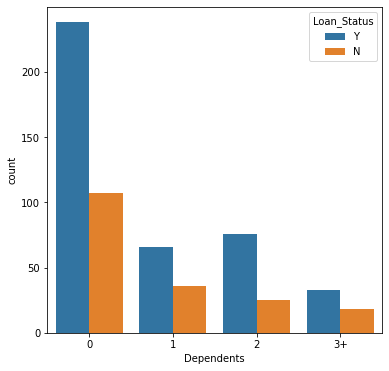

In [50]:
plt.subplots(figsize=(6,6))
sns.countplot(x='Dependents',data=df,hue='Loan_Status')

<AxesSubplot:xlabel='Education', ylabel='count'>

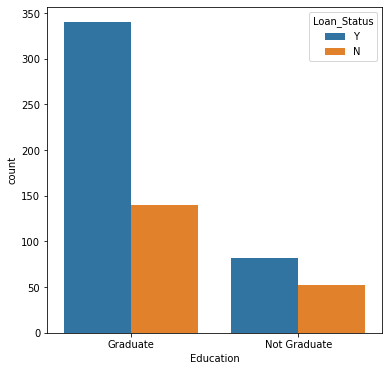

In [51]:
plt.subplots(figsize=(6,6))
sns.countplot(x='Education',data=df,hue='Loan_Status')

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

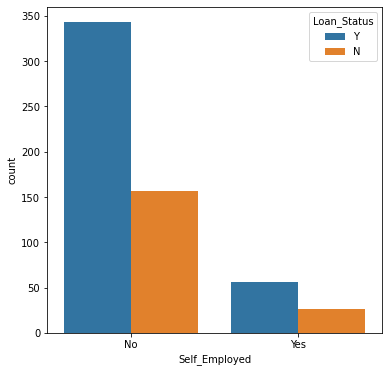

In [52]:
plt.subplots(figsize=(6,6))
sns.countplot(x='Self_Employed',data=df,hue='Loan_Status')

Text(0.5, 1.0, 'Applicant Income')

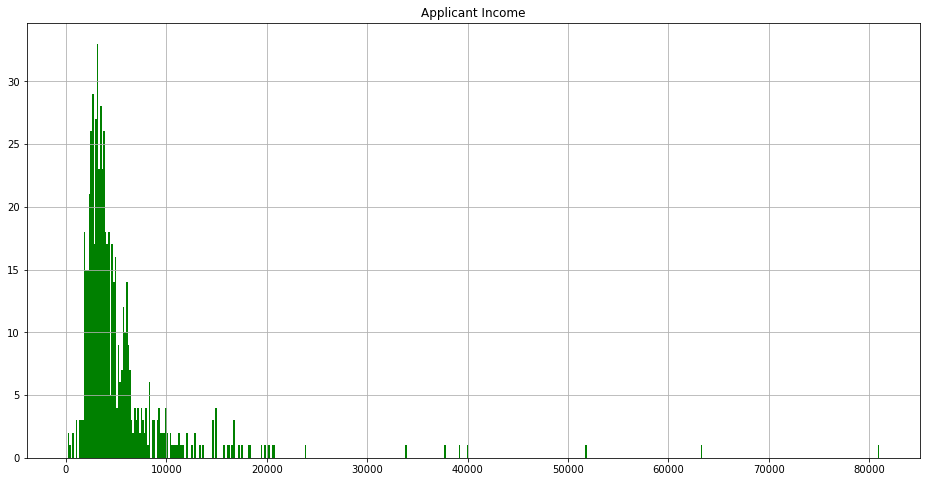

In [53]:
plt.subplots(figsize=(16,8))
df["ApplicantIncome"].hist(grid=True,color='green',bins=500)
plt.title("Applicant Income")

Text(0.5, 1.0, 'Loan Amount')

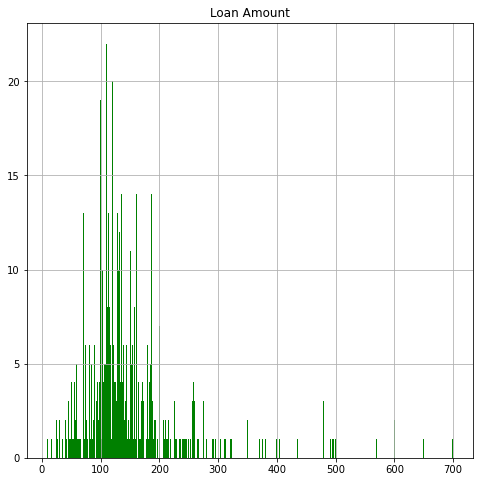

In [54]:
plt.subplots(figsize=(8,8))
df["LoanAmount"].hist(grid=True,color='green',bins=500)
plt.title("Loan Amount")

Text(0.5, 1.0, 'Loan_Amount_Term')

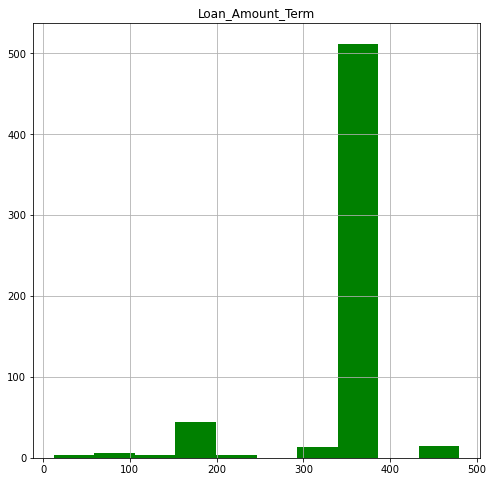

In [55]:
plt.subplots(figsize=(8,8))
df["Loan_Amount_Term"].hist(grid=True,color='green')
plt.title("Loan_Amount_Term")

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

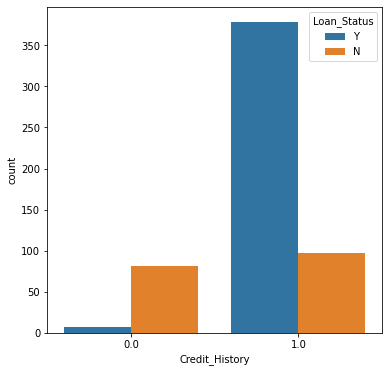

In [56]:
plt.subplots(figsize=(6,6))
sns.countplot(x='Credit_History',data=df,hue='Loan_Status')

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

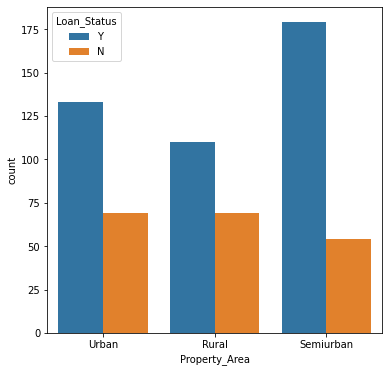

In [4]:
plt.subplots(figsize=(6,6))
sns.countplot(x='Property_Area',data=df,hue='Loan_Status')

# Multivariate Analysis:

<AxesSubplot:title={'center':'Gender  with Maritial Status'}, xlabel='Gender', ylabel='Married'>

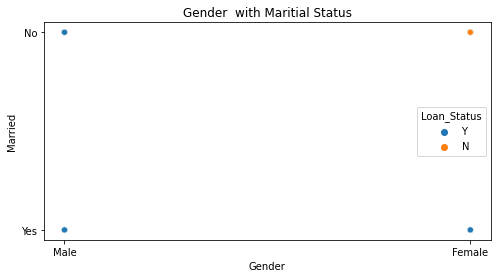

In [58]:
plt.figure(figsize=[8,4])
plt.title('Gender  with Maritial Status')
sns.scatterplot(df['Gender'],df['Married'],hue=df['Loan_Status'])

<AxesSubplot:title={'center':'Dependents with Maritial Status'}, xlabel='Dependents', ylabel='Married'>

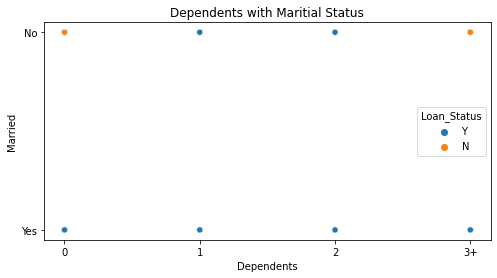

In [59]:
plt.figure(figsize=[8,4])
plt.title('Dependents with Maritial Status')
sns.scatterplot(df['Dependents'],df['Married'],hue=df['Loan_Status'])

<AxesSubplot:title={'center':'Dependents with Gender'}, xlabel='Gender', ylabel='Dependents'>

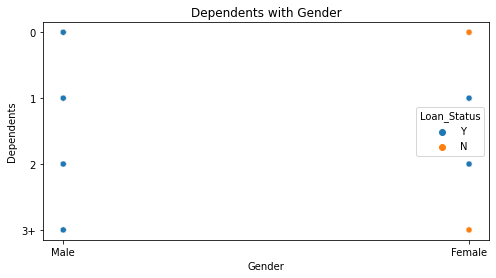

In [60]:
plt.figure(figsize=[8,4])
plt.title('Dependents with Gender')
sns.scatterplot(df['Gender'],df['Dependents'],hue=df['Loan_Status'])

<AxesSubplot:title={'center':'Education with Maritial Status'}, xlabel='Education', ylabel='Married'>

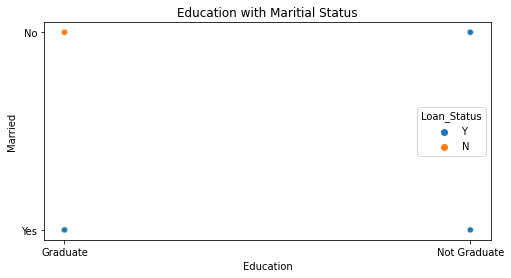

In [61]:
plt.figure(figsize=[8,4])
plt.title('Education with Maritial Status')
sns.scatterplot(df['Education'],df['Married'],hue=df['Loan_Status'])

<AxesSubplot:title={'center':'Self Employement with Maritial Status'}, xlabel='Self_Employed', ylabel='Married'>

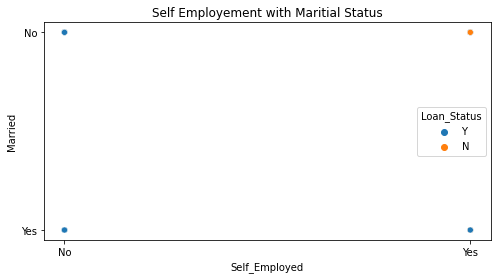

In [62]:
plt.figure(figsize=[8,4])
plt.title('Self Employement with Maritial Status')
sns.scatterplot(df['Self_Employed'],df['Married'],hue=df['Loan_Status'])

<AxesSubplot:title={'center':'Self Employement with Gender'}, xlabel='Self_Employed', ylabel='Gender'>

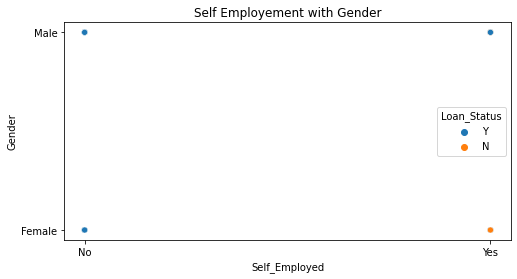

In [63]:
plt.figure(figsize=[8,4])
plt.title('Self Employement with Gender')
sns.scatterplot(df['Self_Employed'],df['Gender'],hue=df['Loan_Status'])

<AxesSubplot:title={'center':'Education with Sex'}, xlabel='Education', ylabel='Gender'>

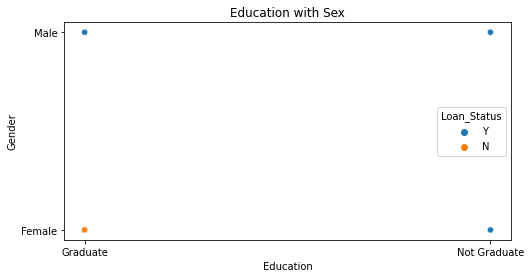

In [64]:
plt.figure(figsize=[8,4])
plt.title('Education with Sex')
sns.scatterplot(df['Education'],df['Gender'],hue=df['Loan_Status'])

<AxesSubplot:title={'center':'Self Employement with Dependents'}, xlabel='Self_Employed', ylabel='Dependents'>

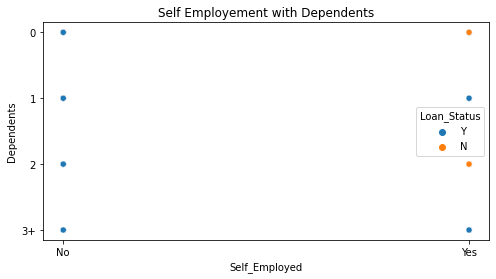

In [65]:
plt.figure(figsize=[8,4])
plt.title('Self Employement with Dependents')
sns.scatterplot(df['Self_Employed'],df['Dependents'],hue=df['Loan_Status'])

<AxesSubplot:title={'center':'Self Employment with Education'}, xlabel='Self_Employed', ylabel='Education'>

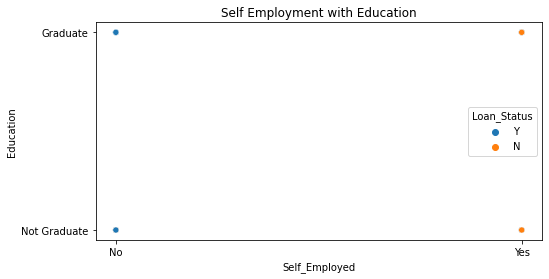

In [66]:
plt.figure(figsize=[8,4])
plt.title('Self Employment with Education')
sns.scatterplot(df['Self_Employed'],df['Education'],hue=df['Loan_Status'])

<AxesSubplot:title={'center':'Applicants Income  with Gender'}, xlabel='ApplicantIncome', ylabel='Gender'>

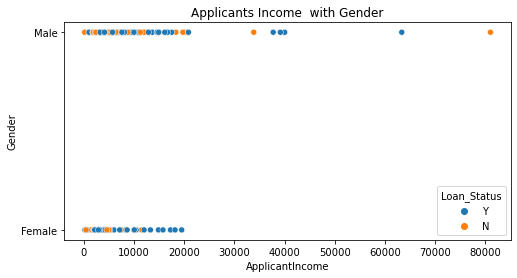

In [67]:
plt.figure(figsize=[8,4])
plt.title('Applicants Income  with Gender')
sns.scatterplot(df['ApplicantIncome'],df['Gender'],hue=df['Loan_Status'])

<AxesSubplot:title={'center':'Applicants Income  with Maritial Status'}, xlabel='ApplicantIncome', ylabel='Married'>

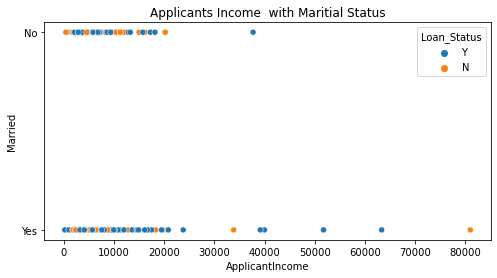

In [68]:
plt.figure(figsize=[8,4])
plt.title('Applicants Income  with Maritial Status')
sns.scatterplot(df['ApplicantIncome'],df['Married'],hue=df['Loan_Status'])

<AxesSubplot:title={'center':'Applicants Income  with Dependents'}, xlabel='ApplicantIncome', ylabel='Dependents'>

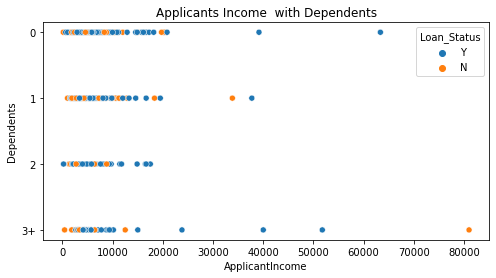

In [69]:
plt.figure(figsize=[8,4])
plt.title('Applicants Income  with Dependents')
sns.scatterplot(df['ApplicantIncome'],df['Dependents'],hue=df['Loan_Status'])

<AxesSubplot:title={'center':'Applicants Income  with Education'}, xlabel='ApplicantIncome', ylabel='Education'>

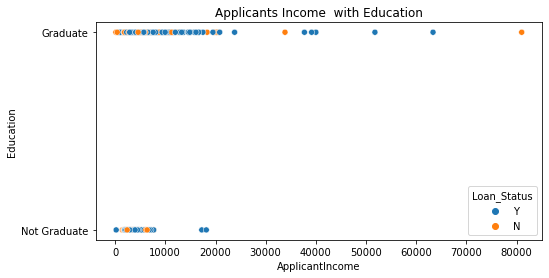

In [70]:
plt.figure(figsize=[8,4])
plt.title('Applicants Income  with Education')
sns.scatterplot(df['ApplicantIncome'],df['Education'],hue=df['Loan_Status'])

<AxesSubplot:title={'center':'Applicants Income  with Self Employed'}, xlabel='ApplicantIncome', ylabel='Self_Employed'>

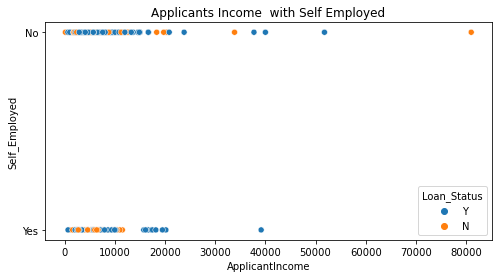

In [71]:
plt.figure(figsize=[8,4])
plt.title('Applicants Income  with Self Employed')
sns.scatterplot(df['ApplicantIncome'],df['Self_Employed'],hue=df['Loan_Status'])

<AxesSubplot:title={'center':'Applicants Income  with Loan Amount'}, xlabel='ApplicantIncome', ylabel='LoanAmount'>

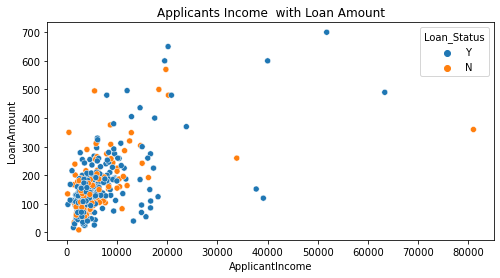

In [72]:
plt.figure(figsize=[8,4])
plt.title('Applicants Income  with Loan Amount')
sns.scatterplot(df['ApplicantIncome'],df['LoanAmount'],hue=df['Loan_Status'])

<AxesSubplot:title={'center':'Applicants Income  with Loan Amount Term '}, xlabel='ApplicantIncome', ylabel='Loan_Amount_Term'>

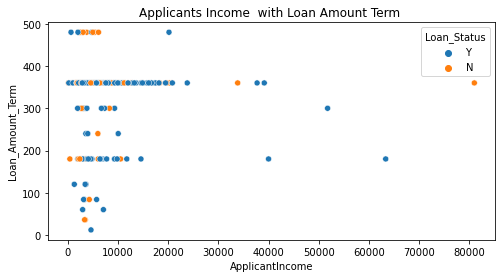

In [73]:
plt.figure(figsize=[8,4])
plt.title('Applicants Income  with Loan Amount Term ')
sns.scatterplot(df['ApplicantIncome'],df['Loan_Amount_Term'],hue=df['Loan_Status'])

<AxesSubplot:title={'center':'Applicants Income  with Credit History'}, xlabel='ApplicantIncome', ylabel='Credit_History'>

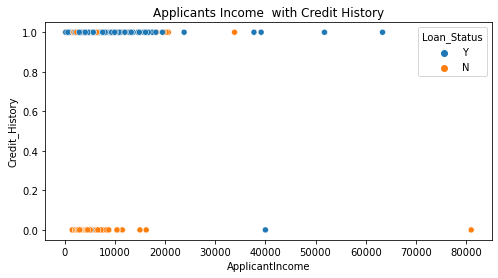

In [74]:
plt.figure(figsize=[8,4])
plt.title('Applicants Income  with Credit History')
sns.scatterplot(df['ApplicantIncome'],df['Credit_History'],hue=df['Loan_Status'])

<AxesSubplot:title={'center':'Applicants Income  with Property Area'}, xlabel='ApplicantIncome', ylabel='Property_Area'>

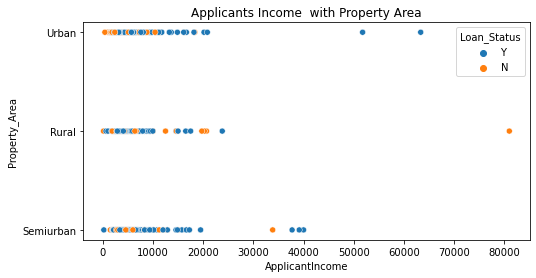

In [75]:
plt.figure(figsize=[8,4])
plt.title('Applicants Income  with Property Area')
sns.scatterplot(df['ApplicantIncome'],df['Property_Area'],hue=df['Loan_Status'])

<AxesSubplot:title={'center':'Loan Status based on Applicants Income'}, xlabel='ApplicantIncome', ylabel='Loan_Status'>

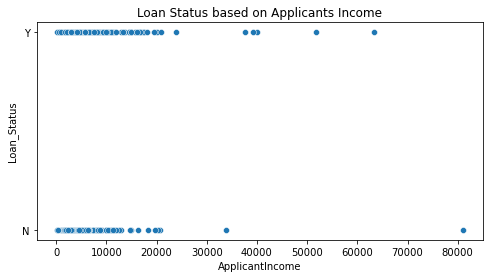

In [76]:
plt.figure(figsize=[8,4])
plt.title('Loan Status based on Applicants Income')
sns.scatterplot(df['ApplicantIncome'],df['Loan_Status'])

<AxesSubplot:title={'center':'Loan Status based on Credit History'}, xlabel='Loan_Status', ylabel='Credit_History'>

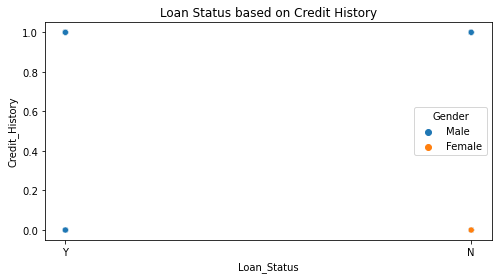

In [77]:
plt.figure(figsize=[8,4])
plt.title('Loan Status based on Credit History')
sns.scatterplot(df['Loan_Status'],df['Credit_History'],hue=df['Gender'])

<AxesSubplot:title={'center':'Loan Status based on Loan Amount'}, xlabel='Loan_Status', ylabel='LoanAmount'>

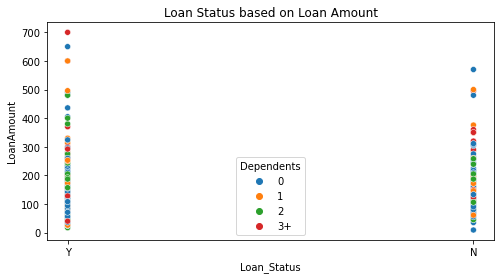

In [78]:
plt.figure(figsize=[8,4])
plt.title('Loan Status based on Loan Amount')
sns.scatterplot(df['Loan_Status'],df['LoanAmount'],hue=df['Dependents'])

<AxesSubplot:title={'center':'Loan Status based on Loan Amount'}, xlabel='Loan_Status', ylabel='ApplicantIncome'>

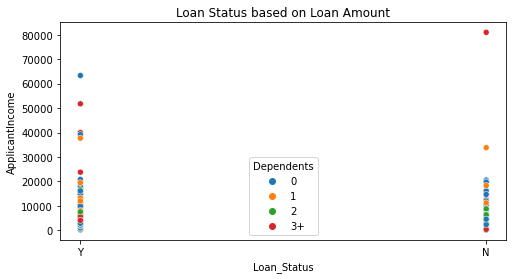

In [79]:
plt.figure(figsize=[8,4])
plt.title('Loan Status based on Loan Amount')
sns.scatterplot(df['Loan_Status'],df['ApplicantIncome'],hue=df['Dependents'])

# Multivariate Analysis:

In [80]:
corr_mat=df_column_dropped.corr()
corr_mat

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.106904,-0.074030,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.146546,-0.100912,0.010938,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163103,-0.103864,-0.040160,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.168759,-0.073928,-0.073658,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115100,-0.033739,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565181,-0.046531,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.189218,-0.059383,0.011134,0.010522,-0.059187
LoanAmount,0.106904,0.146546,0.163103,-0.168759,0.115100,0.565181,0.189218,1.000000,0.036960,-0.000607,-0.046632,-0.033214
Loan_Amount_Term,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.046531,-0.059383,0.036960,1.000000,-0.004705,-0.076120,-0.022549
Credit_History,0.009170,0.010938,-0.040160,-0.073658,-0.001550,-0.018615,0.011134,-0.000607,-0.004705,1.000000,0.001963,0.540556


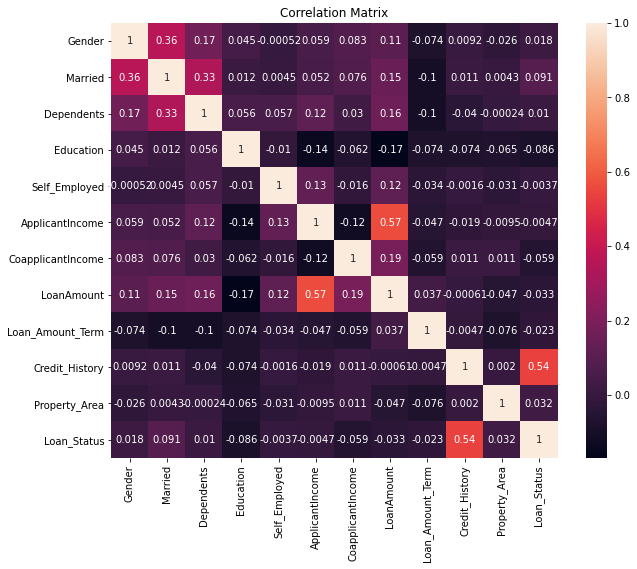

In [81]:
plt.figure(figsize=[10,8])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

# Lets Check Outliers With Box Plots:

Gender                  AxesSubplot(0.125,0.536818;0.110714x0.343182)
Married              AxesSubplot(0.257857,0.536818;0.110714x0.343182)
Dependents           AxesSubplot(0.390714,0.536818;0.110714x0.343182)
Education            AxesSubplot(0.523571,0.536818;0.110714x0.343182)
Self_Employed        AxesSubplot(0.656429,0.536818;0.110714x0.343182)
ApplicantIncome      AxesSubplot(0.789286,0.536818;0.110714x0.343182)
CoapplicantIncome          AxesSubplot(0.125,0.125;0.110714x0.343182)
LoanAmount              AxesSubplot(0.257857,0.125;0.110714x0.343182)
Loan_Amount_Term        AxesSubplot(0.390714,0.125;0.110714x0.343182)
Credit_History          AxesSubplot(0.523571,0.125;0.110714x0.343182)
Property_Area           AxesSubplot(0.656429,0.125;0.110714x0.343182)
Loan_Status             AxesSubplot(0.789286,0.125;0.110714x0.343182)
dtype: object

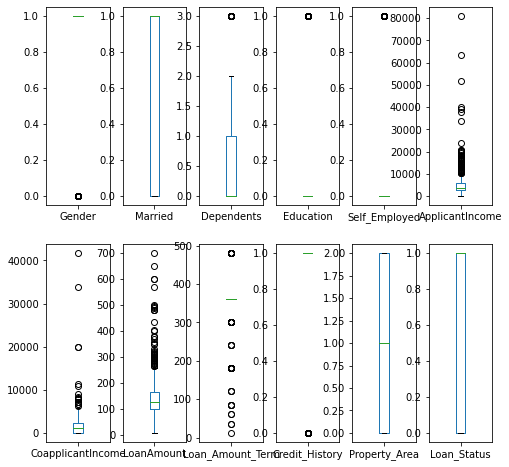

In [82]:
df_column_dropped.plot(kind='box',subplots=True,layout=(2,6),figsize=[8,8])

# Lets Check Skewness:

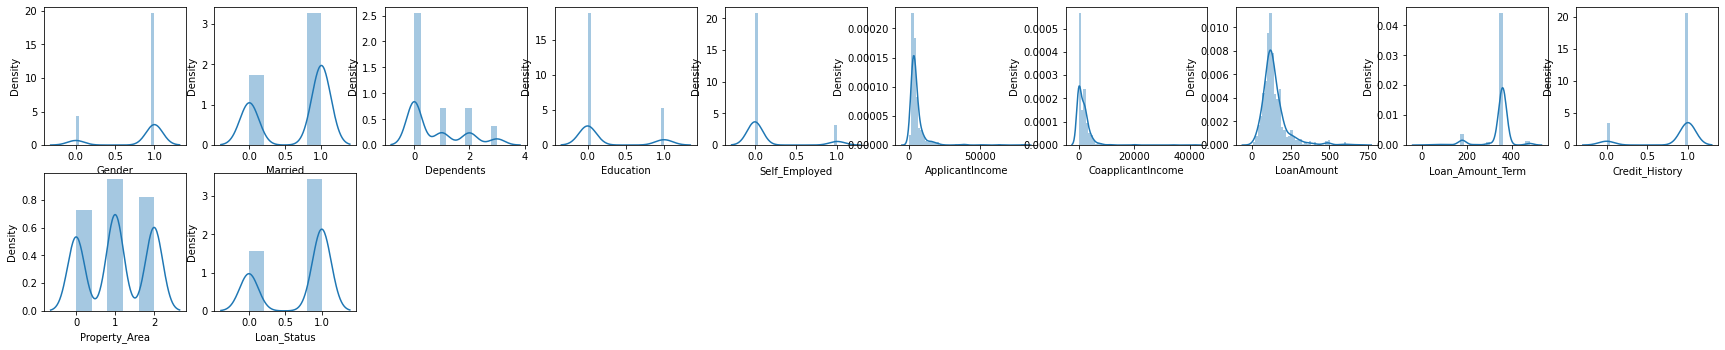

In [83]:
collist2=df_column_dropped.columns.values
plt.figure(figsize=(30,30))
for i in range(0,len(collist2)):
    plt.subplot(10,10,i+1)
    sns.distplot(df_column_dropped[collist2[i]])

In [84]:
df_column_dropped.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.743053
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

# Outlier Removal:

In [85]:
from scipy.stats import zscore
z=np.abs(zscore(df_column_dropped))
df_zscore=df_column_dropped[(z<3).all(axis=1)]

In [86]:
df_column_dropped.shape

(614, 12)

In [87]:
df_zscore.shape

(577, 12)

In [88]:
((614-577)/614)*100

6.026058631921824

# Balancing of Imbalanced data and Standardisation:

In [89]:
df_zscore.Loan_Status.value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

In [90]:
df_zscore['Loan_Status'].value_counts(normalize=True)

1    0.689775
0    0.310225
Name: Loan_Status, dtype: float64

In [91]:
df.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [92]:
count_class1,count_class0=df_zscore.Loan_Status.value_counts()

In [93]:
count_class0 ,count_class1

(179, 398)

In [94]:
df_class0=df_zscore[df_column_dropped['Loan_Status']==0]
df_class1=df_zscore[df_column_dropped['Loan_Status']==1]

In [95]:
df_class0.shape

(179, 12)

In [96]:
df_class1.shape

(398, 12)

In [97]:
df_class_oversample=df_class0.sample(count_class1,replace=True)
df_class_oversample.shape

(398, 12)

In [98]:
df_final_oversample=pd.concat([df_class1,df_class_oversample],axis=0)
df_final_oversample.shape

(796, 12)

In [99]:
print("Ramdom Over sampling:")
print(df_final_oversample.Loan_Status.value_counts())

Ramdom Over sampling:
1    398
0    398
Name: Loan_Status, dtype: int64


In [100]:
x=df_final_oversample.drop("Loan_Status",axis=1)
y=df_final_oversample["Loan_Status"]

In [101]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.22,random_state=12,stratify=y)

In [102]:
y_train.value_counts()

1    310
0    310
Name: Loan_Status, dtype: int64

# Skewness Handling:

In [103]:
from sklearn.preprocessing import power_transform
df_skew=power_transform(x)
df_skew=pd.DataFrame(df_skew,columns=x.columns)

In [104]:
x=df_skew

In [105]:
df_skew.skew()

Gender              -1.494989
Married             -0.570589
Dependents           0.477600
Education            1.180313
Self_Employed        2.195974
ApplicantIncome      0.043730
CoapplicantIncome   -0.125921
LoanAmount           0.073562
Loan_Amount_Term     0.628173
Credit_History      -1.261142
Property_Area       -0.153056
dtype: float64

# Best Ramdom state checking:

In [106]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.22,random_state=i,stratify=y)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is  "  ,maxAccu , "  at random_state:", maxRS)

Best accuracy is   0.8011363636363636   at random_state: 3


In [107]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.22,random_state=maxRS,stratify=y)

# Model Building:
Lets check with 3 to 4 models for checking the best score from which models.

In [108]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(f1_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.9034090909090909
0.896969696969697
[[85  3]
 [14 74]]
              precision    recall  f1-score   support

           0       0.86      0.97      0.91        88
           1       0.96      0.84      0.90        88

    accuracy                           0.90       176
   macro avg       0.91      0.90      0.90       176
weighted avg       0.91      0.90      0.90       176



In [109]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(f1_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.9431818181818182
0.942528735632184
[[84  4]
 [ 6 82]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        88
           1       0.95      0.93      0.94        88

    accuracy                           0.94       176
   macro avg       0.94      0.94      0.94       176
weighted avg       0.94      0.94      0.94       176



In [110]:
svc=SVC()
svc.fit(x_train,y_train)
predsv=svc.predict(x_test)
print(accuracy_score(y_test,predsv))
print(confusion_matrix(y_test,predsv))
print(classification_report(y_test,predsv))

0.8295454545454546
[[65 23]
 [ 7 81]]
              precision    recall  f1-score   support

           0       0.90      0.74      0.81        88
           1       0.78      0.92      0.84        88

    accuracy                           0.83       176
   macro avg       0.84      0.83      0.83       176
weighted avg       0.84      0.83      0.83       176



In [111]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predgnb=gnb.predict(x_test)
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

0.7727272727272727
[[55 33]
 [ 7 81]]
              precision    recall  f1-score   support

           0       0.89      0.62      0.73        88
           1       0.71      0.92      0.80        88

    accuracy                           0.77       176
   macro avg       0.80      0.77      0.77       176
weighted avg       0.80      0.77      0.77       176



In [112]:
ab=AdaBoostClassifier()
ab.fit(x_train,y_train)
predab=ab.predict(x_test)
print(accuracy_score(y_test,predab))
print(confusion_matrix(y_test,predab))
print(classification_report(y_test,predab))

0.8352272727272727
[[64 24]
 [ 5 83]]
              precision    recall  f1-score   support

           0       0.93      0.73      0.82        88
           1       0.78      0.94      0.85        88

    accuracy                           0.84       176
   macro avg       0.85      0.84      0.83       176
weighted avg       0.85      0.84      0.83       176



In [113]:
scr=cross_val_score(dt,x,y,cv=5,scoring='f1')
print("Cross Validation Score of DecisionTree Model is : ", scr.mean())

Cross Validation Score of DecisionTree Model is :  0.8464277722594747


In [114]:
scr=cross_val_score(rf,x,y,cv=5,scoring='f1')
print("Cross Validation Score of RandomForest Model is : ", scr.mean())

Cross Validation Score of RandomForest Model is :  0.9129688445470382


In [115]:
scr=cross_val_score(svc,x,y,cv=5,scoring='f1')
print("Cross Validation Score of Support Vector Model is : ", scr.mean())

Cross Validation Score of Support Vector Model is :  0.7823005835560077


In [116]:
scr=cross_val_score(gnb,x,y,cv=5,scoring='f1')
print("Cross Validation Score of GussianNB Model is : ", scr.mean())

Cross Validation Score of GussianNB Model is :  0.7682147483868674


In [117]:
scr=cross_val_score(ab,x,y,cv=5,scoring='f1')
print("Cross Validation Score of AdaBoost Model is : ", scr.mean())

Cross Validation Score of AdaBoost Model is :  0.7752333517190065


# 1st Parameter Tuning:
SVC model tuning

In [118]:
#svm = SVC(kernel=”rbf”) : 
parameters = {'C': [1, 10, 100],'gamma': [.01, .1],'kernel':['poly','rbf','sigmoid']}

In [119]:
gcv=GridSearchCV(SVC(), parameters,cv=5) #Tuning svc

In [120]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 100], 'gamma': [0.01, 0.1],
                         'kernel': ['poly', 'rbf', 'sigmoid']})

In [121]:
gcv.best_params_

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

In [122]:
mod=SVC(C=100,gamma=0.1,kernel='rbf',random_state=maxRS)
mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(f1_score(y_test,pred)*100)

84.52380952380952


# 2nd Parameter tuning:
GaussinNB model

In [123]:
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

In [124]:
gcv=GridSearchCV(GaussianNB(), params_NB,cv=5) #Tuning NB

In [125]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])})

In [126]:
gcv.best_params_

{'var_smoothing': 0.657933224657568}

In [127]:
mod1=GaussianNB(var_smoothing=0.657933224657568)
mod1.fit(x_train,y_train)
pred=mod1.predict(x_test)
print(f1_score(y_test,pred)*100)

83.41232227488152


# 3rd Parameter Tuning:
RandomForestClassifier

In [128]:
parameters={'max_depth': np.arange(2,10),
             'criterion': ['gini','entropy']}

In [129]:
gcv=GridSearchCV(RandomForestClassifier(), parameters,cv=5) #Tuning RandomForestClassifier

In [130]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [131]:
gcv.best_params_

{'criterion': 'gini', 'max_depth': 9}

In [132]:
mod3=RandomForestClassifier(criterion='gini',max_depth=9,random_state=maxRS)
mod3.fit(x_train,y_train)
pred=mod3.predict(x_test)
print(f1_score(y_test,pred)*100)

92.47311827956989


# 4th Parameter Tuning:
DecisionTreeClassifier

In [133]:
from scipy.stats import randint
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

In [134]:
gcv=GridSearchCV(DecisionTreeClassifier(), parameters,cv=5) #Tuning DecisionTreeClassifier

In [135]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [136]:
gcv.best_params_

{'criterion': 'entropy', 'max_depth': 9}

In [137]:
mod4=DecisionTreeClassifier(criterion='entropy',max_depth=9,random_state=maxRS)
mod4.fit(x_train,y_train)
pred=mod4.predict(x_test)
print(f1_score(y_test,pred)*100)

85.10638297872342


# After parameter tuning ,We have got 92.4% accuracy from RandomForestClassifier model.Hence it is best model to proceed for Prediction.


### Lets Check with AUC-ROC curve % :

In [138]:
from sklearn.metrics import plot_roc_curve

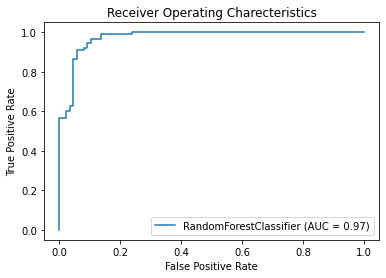

In [139]:
plot_roc_curve(mod3,x_test,y_test)
plt.title('Receiver Operating Charecteristics')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## Observation: Seems to be almost 97% with RandomForest model in AUC-ROC plot which is best percentage score.

# Saving the model:

In [140]:
import joblib
joblib.dump(mod3,"Loan_Status.pkl")

['Loan_Status.pkl']

# Loading the Model:

In [141]:
mod3=joblib.load("Loan_Status.pkl")

In [142]:
prediction=mod3.predict(x_test)

In [143]:
print(f1_score(y_test,prediction)*100)

92.47311827956989


In [144]:
prediction=pd.DataFrame(prediction) #Converting into Dataframe

In [145]:
prediction.to_csv('Attrition_model.csv') #Saving the predictions

In [146]:
prediction

,0
0,1
1,0
2,0
3,1
4,1
...,...
171,1
172,1
173,1
174,1


### Summary and Observation:
Hence we have Saved the model and Checked by loading whether its working fine. and ckecked with predicting.